In [1]:
from plotly.graph_objs import Bar, Scatter, Layout, Figure
from plotly.graph_objs.layout import YAxis
from plotly.offline import iplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [2]:
SP500 = pd.read_csv('./data/SP500.csv',index_col='Date').dropna(axis=1)
SP500Index = pd.read_csv('./data/^GSPC.csv',index_col='Date')['Close'][:len(SP500)]
names = SP500.columns.values

In [3]:
SP500norm = (SP500 - SP500.mean())/SP500.std()

In [4]:
cov = SP500norm.cov()
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

In [8]:
len(var_exp)

495

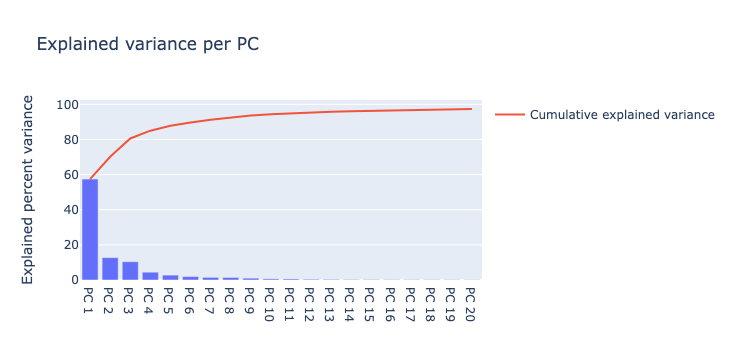

In [11]:
tot = sum(eig_vals)

var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
    x=[f'PC {i}' for i in range(1,21)],
    y=var_exp,
    showlegend=False)

trace2 = Scatter(
    x=[f'PC {i}' for i in range(1,21)],
    y=cum_var_exp,
    name='Cumulative explained variance')

data = (trace1,trace2)

layout = Layout(yaxis=YAxis(title='Explained percent variance'),
                title = 'Explained variance per PC')

fig = Figure(data=data,layout=layout)

iplot(fig)

In [12]:
PCs = np.matmul(SP500norm.values, eig_vecs)
PCs = pd.DataFrame(PCs, index=SP500norm.index)
PCs['SP500'] = (SP500Index - SP500Index.mean())/SP500Index.std()

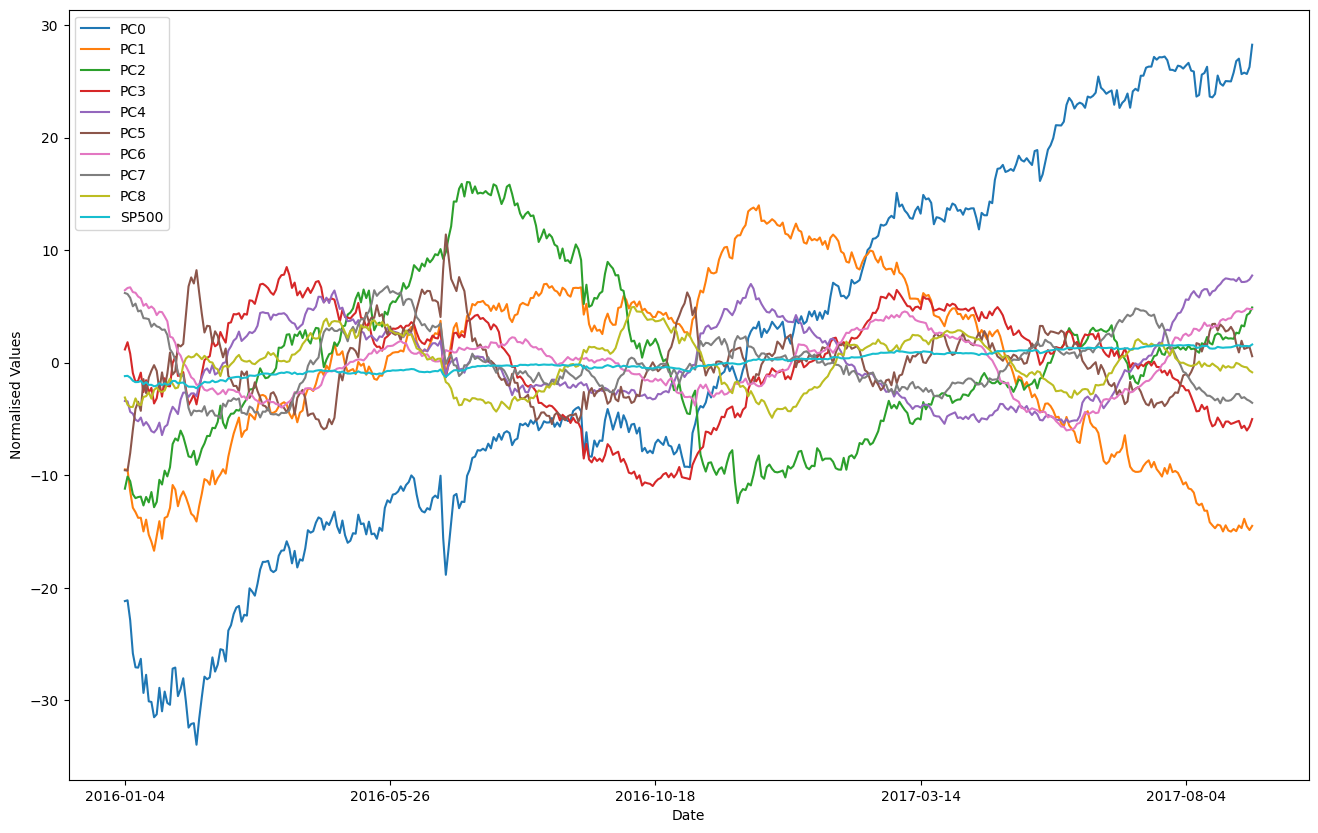

In [16]:
colnames = ['PC'+str(i) for i in np.arange(len(PCs.columns.values) - 1)] + ['SP500']
PCs.columns = colnames
PC8 = PCs[['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','SP500']]
PC8.plot(figsize=(16, 10))
plt.ylabel('Normalised Values');

In [17]:
Y = PCs['SP500']
X = PCs[['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8','PC9']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.990e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:36:18   Log-Likelihood:                 859.22
No. Observations:                 426   AIC:                            -1696.
Df Residuals:                     415   BIC:                            -1652.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.971e-16      0.002  -5.04e-13      1.000      -0.003       0.003
PC0            0.0591   9.38e-05    629.335      0.000       0.059       0.059
PC1            0.0076      0.000     38.078      0.000       0.007       0.008
PC2            0.0025      0.000     11.555      0.000       0.002       0.003
PC3            0.0072      0.000     21.459      0.000       0.007       0.008
PC4            0.0027      0.000      6.429      0.000       0.002       0.004
PC5           -0.0109      0.001    -21.312      0.000      -0.012      -0.010
PC6            0.0068      0.001     11.770      0.000       0.006       0.008
PC7           -0.0080      0.001    -13.528      0.000      -0.009      -0.007
PC8           -0.0039      0.001     -5.678      0.000      -0.005      -0.003
PC9            0.0049      0.001      5.572      0.000       0.003       0.007
==============================================================================
Omnibus:                        6.328   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.421
Skew:                           0.102   Prob(JB):                        0.110
Kurtosis:                       2.545   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
PCs['SP500']

Date
2016-01-04   -1.194516
2016-01-05   -1.170588
2016-01-06   -1.326860
2016-01-07   -1.605550
2016-01-08   -1.729976
                ...   
2017-09-05    1.435756
2017-09-06    1.481189
2017-09-07    1.478590
2017-09-08    1.456906
2017-09-11    1.614538
Name: SP500, Length: 426, dtype: float64

In [19]:
Y

Date
2016-01-04    19.992277
2016-01-05    19.944389
2016-01-06    21.563417
2016-01-07    24.221153
2016-01-08    25.340828
                ...    
2017-09-05   -24.203237
2017-09-06   -24.288516
2017-09-07   -24.172208
2017-09-08   -24.811963
2017-09-11   -26.635997
Length: 426, dtype: float64